In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
pd.set_option('display.max_columns', None)

# Games Analysis

In [2]:
games_df = pd.read_csv('Match_results.csv')

In [3]:
print(f'We have data for {games_df.shape[0]} games of this season')
games_df.head(3)

We have data for 33 games of this season


,Date,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation
0,2024-08-17,Matchweek 1,Sat,Away,W,2.0,1.0,Valencia,63.0,46673.0,Marc-André ter Stegen,4-2-3-1,4-4-2
1,2024-08-24,Matchweek 2,Sat,Home,W,2.0,1.0,Athletic Club,64.0,46448.0,Marc-André ter Stegen,4-2-3-1,4-2-3-1
2,2024-08-27,Matchweek 3,Tue,Away,W,2.0,1.0,Rayo Vallecano,64.0,14031.0,Marc-André ter Stegen,4-2-3-1,4-4-2


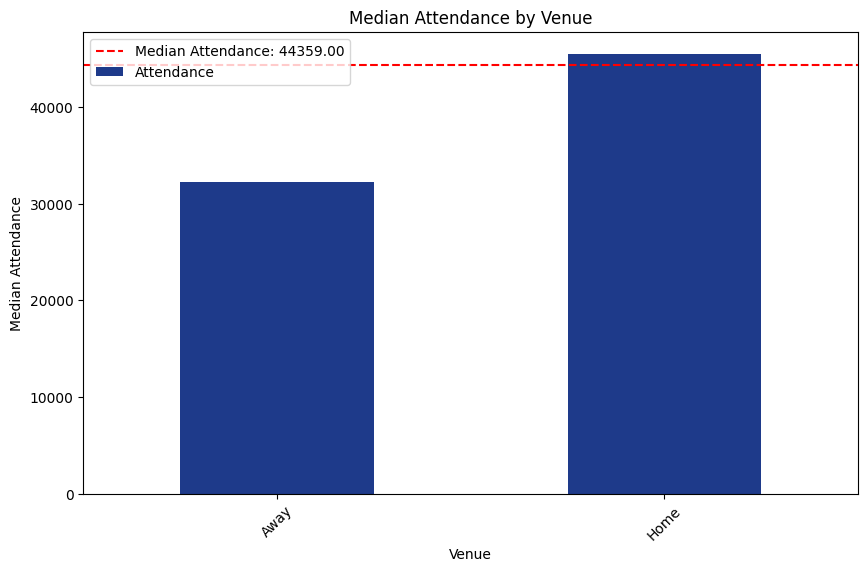

In [4]:
#Let us see how Possesion changes with Venue
avg_attnd_by_venue = games_df.groupby('Venue')['Attendance'].mean()
# Overall average possession for the season
overall_avg_attnd = games_df['Attendance'].median()

# Plotting
plt.figure(figsize=(10, 6))
avg_attnd_by_venue.plot(kind='bar', color='#1E3A8A')  # Custom color

# Add a horizontal line for the overall average possession this season
plt.axhline(y=overall_avg_attnd, color='red', linestyle='--', label=f'Median Attendance: {overall_avg_attnd:.2f}')
plt.title('Median Attendance by Venue')
plt.xlabel('Venue')
plt.ylabel('Median Attendance')
plt.xticks(rotation=45)
plt.legend()
plt.show()

wasn't necessary but good to know, this graph is subjected to stadium capacity as well, that's why more attendance at home ground.

In [5]:
custom_colors = {
    'W': '#1E3A8A',   # cooler navy blue
    'D': '#FBC02D',   # gold
    'L': '#D32F2F'    # calm magenta
}

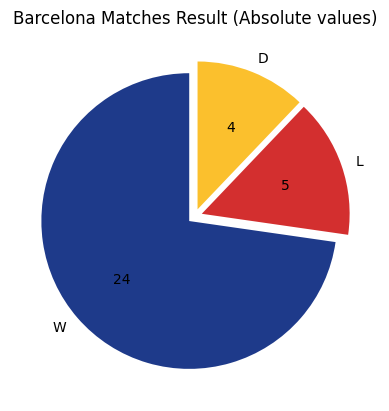

In [6]:
result_counts = games_df['Result'].value_counts()
# Match the colors to result order
colors = [custom_colors[result] for result in result_counts.index]

fig, ax = plt.subplots()
ax.pie(
    result_counts,
    labels=result_counts.index,
    autopct=lambda p: f'{int(p * sum(result_counts) / 100)}',
    startangle=90,
    explode=[0.05] * len(result_counts),
    colors=colors
)
plt.title('Barcelona Matches Result (Absolute values)')
plt.show()

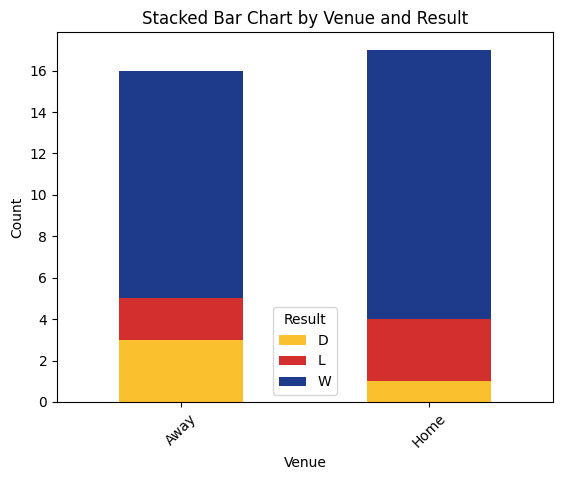

In [7]:
#Proportions of the home and away games played and the results
crosstab = pd.crosstab(games_df['Venue'], games_df['Result'])
# Plotting
crosstab.plot(kind='bar', stacked=True, color=custom_colors)
plt.title('Stacked Bar Chart by Venue and Result')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.legend(title='Result')
plt.xticks(rotation=45) 
plt.show()

We lost more games at home (3) than away, which is intersting and unusual at the same time.

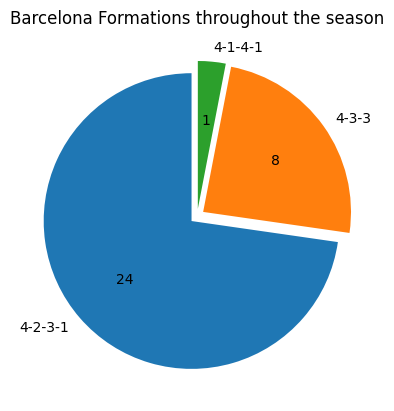

In [31]:
result_counts = games_df['Formation'].value_counts()
fig, ax = plt.subplots()
ax.pie(
    result_counts,
    labels=result_counts.index,
    autopct=lambda p: f'{int(p * sum(result_counts) / 100)}',
    startangle=90,
    explode=[0.05] * len(result_counts)
)
plt.title('Barcelona Formations throughout the season')
plt.show()

In [9]:
lost_games = games_df[games_df['Result'].isin(['L','D'])]
lost_games[['Opponent','Opp Formation','GF','GA','Result','Venue','Round','Poss']]

,Opponent,Opp Formation,GF,GA,Result,Venue,Round,Poss
7,Osasuna,4-3-3,2.0,4.0,L,Away,Matchweek 8,73.0
12,Real Sociedad,4-1-4-1,0.0,1.0,L,Away,Matchweek 13,69.0
13,Celta Vigo,4-4-2,2.0,2.0,D,Away,Matchweek 14,59.0
14,Las Palmas,4-2-3-1,1.0,2.0,L,Home,Matchweek 15,69.0
16,Betis,4-2-3-1,2.0,2.0,D,Away,Matchweek 16,62.0
17,Leganés,5-4-1,0.0,1.0,L,Home,Matchweek 17,79.0
18,Atlético Madrid,4-4-2,1.0,2.0,L,Home,Matchweek 18,62.0
19,Getafe,4-1-4-1,1.0,1.0,D,Away,Matchweek 20,77.0
29,Betis,4-2-3-1,1.0,1.0,D,Home,Matchweek 30,73.0


1. Despite of being the current leader of the leage, Barcelona had a terrible run from week 13 to week 20, where we were only manage to win 1 out of 8 games played.
2. We could not beat Betis this season in LA LIGA, last time this happened was in 2006/7 season.

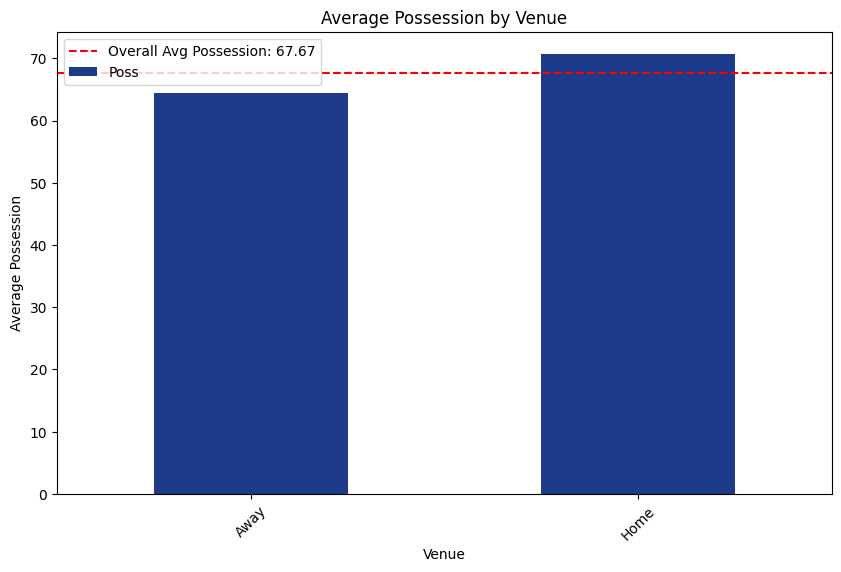

In [10]:
#Let us see how Possesion changes with Venue
avg_possession_by_venue = games_df.groupby('Venue')['Poss'].mean()
# Overall average possession for the season
overall_avg_possession = games_df['Poss'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_possession_by_venue.plot(kind='bar', color='#1E3A8A')  # Custom color

# Add a horizontal line for the overall average possession this season
plt.axhline(y=overall_avg_possession, color='red', linestyle='--', label=f'Overall Avg Possession: {overall_avg_possession:.2f}')
plt.title('Average Possession by Venue')
plt.xlabel('Venue')
plt.ylabel('Average Possession')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The average possession on away games is less than the overall average, meaning we somewhat struggle to dictate the games on away pitches. However, there might be some other tactical reasons behind this (such as style of play of the other team so we had to adjust accordingly, key players not available and so on)

In [11]:
games_df['GD'] = games_df['GF']-games_df['GA']

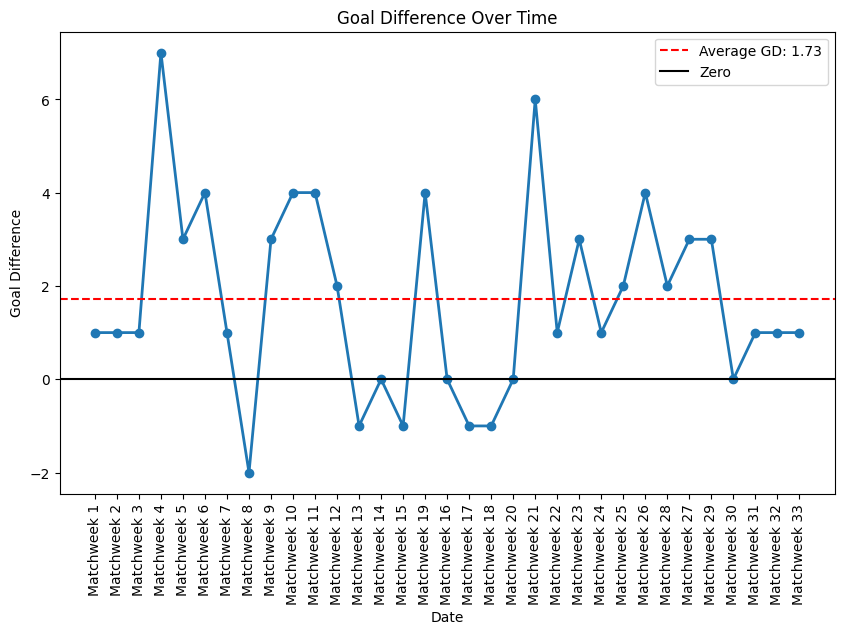

In [12]:
games_df['Date'] = pd.to_datetime(games_df['Date'])

# Calculate the average Goal Difference (GD)
average_gd = games_df['GD'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Line chart for 'Date' and 'GD' (Goal Difference)
plt.plot(games_df['Round'], games_df['GD'], marker='o', linestyle='-', linewidth=2)

# Add a horizontal line for the average GD
plt.axhline(y=average_gd, color='red', linestyle='--', label=f'Average GD: {average_gd:.2f}')
plt.axhline(y=0, color='black', linestyle='-', label=f'Zero')

# Add title and labels
plt.title('Goal Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Goal Difference')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
plt.legend()

# Show plot
plt.show()

# SQUAD

In [13]:
players = pd.read_csv('Players.csv')

In [14]:
players.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Progressive_C,Progressive_P,Progressive_R,Per_90_Gls,Per_90_Ast,Per_90_G+A,Per_90_G-PK,Per_90_G+A-PK
0,Pedri,es ESP,MF,22-151,32,30,2529.0,28.1,4.0,4.0,8.0,4.0,0.0,0.0,2.0,0.0,77.0,295.0,115.0,0.14,0.14,0.28,0.14,0.28
1,Jules Koundé,fr FRA,DF,26-164,32,29,2605.0,28.9,2.0,3.0,5.0,2.0,0.0,0.0,4.0,0.0,44.0,165.0,190.0,0.07,0.10,0.17,0.07,0.17
2,Robert Lewandowski,pl POL,FW,36-247,31,29,2442.0,27.1,25.0,2.0,27.0,22.0,3.0,4.0,1.0,0.0,25.0,48.0,150.0,0.92,0.07,1.00,0.81,0.88
3,Raphinha,br BRA,"FW,MF",28-132,31,28,2461.0,27.3,15.0,9.0,24.0,13.0,2.0,2.0,4.0,0.0,84.0,129.0,296.0,0.55,0.33,0.88,0.48,0.80
4,Lamine Yamal,es ESP,FW,17-286,30,27,2443.0,27.1,6.0,12.0,18.0,6.0,0.0,0.0,3.0,0.0,152.0,140.0,385.0,0.22,0.44,0.66,0.22,0.66


### How many players played for Barcelona this season?

In [15]:
players_used = players[players['Min']>0]
print(f"This season Barcelona have played {players_used.shape[0]} players in Laliga")
players_used.sort_values('MP',ascending=False)

This season Barcelona have played 27 players in Laliga


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Progressive_C,Progressive_P,Progressive_R,Per_90_Gls,Per_90_Ast,Per_90_G+A,Per_90_G-PK,Per_90_G+A-PK
0,Pedri,es ESP,MF,22-151,32,30,2529.0,28.1,4.0,4.0,8.0,4.0,0.0,0.0,2.0,0.0,77.0,295.0,115.0,0.14,0.14,0.28,0.14,0.28
1,Jules Koundé,fr FRA,DF,26-164,32,29,2605.0,28.9,2.0,3.0,5.0,2.0,0.0,0.0,4.0,0.0,44.0,165.0,190.0,0.07,0.10,0.17,0.07,0.17
2,Robert Lewandowski,pl POL,FW,36-247,31,29,2442.0,27.1,25.0,2.0,27.0,22.0,3.0,4.0,1.0,0.0,25.0,48.0,150.0,0.92,0.07,1.00,0.81,0.88
3,Raphinha,br BRA,"FW,MF",28-132,31,28,2461.0,27.3,15.0,9.0,24.0,13.0,2.0,2.0,4.0,0.0,84.0,129.0,296.0,0.55,0.33,0.88,0.48,0.80
5,Pau Cubarsí,es ESP,DF,18-093,31,26,2342.0,26.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,25.0,186.0,6.0,0.00,0.12,0.12,0.00,0.12
4,Lamine Yamal,es ESP,FW,17-286,30,27,2443.0,27.1,6.0,12.0,18.0,6.0,0.0,0.0,3.0,0.0,152.0,140.0,385.0,0.22,0.44,0.66,0.22,0.66
7,Alejandro Balde,es ESP,DF,21-189,28,25,2080.0,23.1,0.0,4.0,4.0,0.0,0.0,0.0,2.0,0.0,98.0,86.0,231.0,0.00,0.17,0.17,0.00,0.17
6,Iñigo Martínez,es ESP,DF,33-343,26,26,2310.0,25.7,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,66.0,249.0,11.0,0.00,0.16,0.16,0.00,0.16
11,Ferrán Torres,es ESP,"FW,MF",25-055,26,11,1018.0,11.3,10.0,3.0,13.0,10.0,0.0,0.0,1.0,1.0,23.0,35.0,96.0,0.88,0.27,1.15,0.88,1.15
14,Eric García,es ESP,"MF,DF",24-106,24,10,1224.0,13.6,1.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,16.0,88.0,12.0,0.07,0.15,0.22,0.07,0.22


### *Your best ability is your availability*


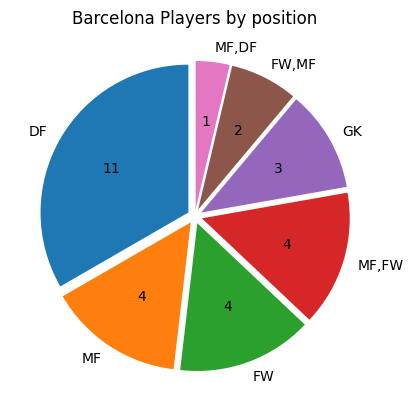

In [32]:
players_counts = players_used['Pos'].value_counts()
fig, ax = plt.subplots()
ax.pie(
    players_counts,
    labels=players_counts.index,
    autopct=lambda p: f'{int(p * sum(result_counts) / 100)}',
    startangle=90,
    explode=[0.05] * len(players_counts)
)
plt.title('Barcelona Players by position')
plt.show()

This shows a clear impbalance in the squad in terms of defenders vs the attackers we have.


### Top 11 players to have played most games.

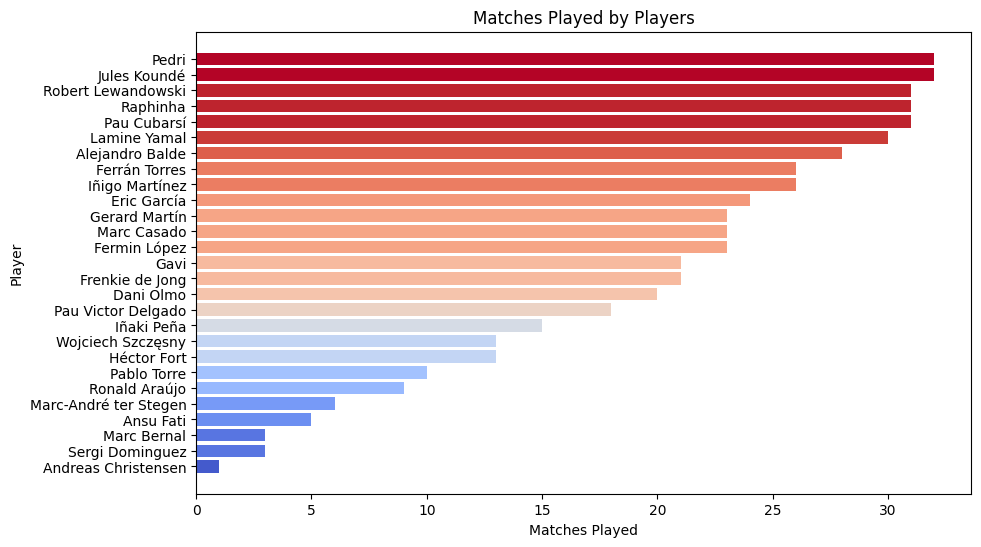

In [17]:
players_used = players_used.sort_values('MP',ascending=True)

# Plotting a horizontal bar chart for 'MP' (Matches Played)
plt.figure(figsize=(10, 6))

# You can either use a single color or assign a custom set of colors.
# Here, we're using blue for all bars, but you can change this to any color.
bars = plt.barh(players_used['Player'], players_used['MP'], 
                color=plt.cm.coolwarm(players_used['MP'] / max(players_used['MP'])))

# Add title and labels
plt.title('Matches Played by Players')
plt.xlabel('Matches Played')
plt.ylabel('Player')
plt.show()

Pedri, Kounde, Lewa, Raphinha, Cubarsi and Yamal have been the most consistently used players in Flick's system

### How many players have scored for barcelona this year?

In [33]:
scorers = players_used[players_used['Gls']>0]
print(f"{scorers.shape[0]} different players have scored for Barca this season.")
scorers.sort_values('Gls',ascending=False).head(6)

16 different players have scored for Barca this season.


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Progressive_C,Progressive_P,Progressive_R,Per_90_Gls,Per_90_Ast,Per_90_G+A,Per_90_G-PK,Per_90_G+A-PK
2,Robert Lewandowski,pl POL,FW,36-247,31,29,2442.0,27.1,25.0,2.0,27.0,22.0,3.0,4.0,1.0,0.0,25.0,48.0,150.0,0.92,0.07,1.00,0.81,0.88
3,Raphinha,br BRA,"FW,MF",28-132,31,28,2461.0,27.3,15.0,9.0,24.0,13.0,2.0,2.0,4.0,0.0,84.0,129.0,296.0,0.55,0.33,0.88,0.48,0.80
11,Ferrán Torres,es ESP,"FW,MF",25-055,26,11,1018.0,11.3,10.0,3.0,13.0,10.0,0.0,0.0,1.0,1.0,23.0,35.0,96.0,0.88,0.27,1.15,0.88,1.15
12,Dani Olmo,es ESP,"MF,FW",26-353,20,11,998.0,11.1,9.0,2.0,11.0,8.0,1.0,1.0,0.0,0.0,27.0,67.0,85.0,0.81,0.18,0.99,0.72,0.90
4,Lamine Yamal,es ESP,FW,17-286,30,27,2443.0,27.1,6.0,12.0,18.0,6.0,0.0,0.0,3.0,0.0,152.0,140.0,385.0,0.22,0.44,0.66,0.22,0.66
0,Pedri,es ESP,MF,22-151,32,30,2529.0,28.1,4.0,4.0,8.0,4.0,0.0,0.0,2.0,0.0,77.0,295.0,115.0,0.14,0.14,0.28,0.14,0.28


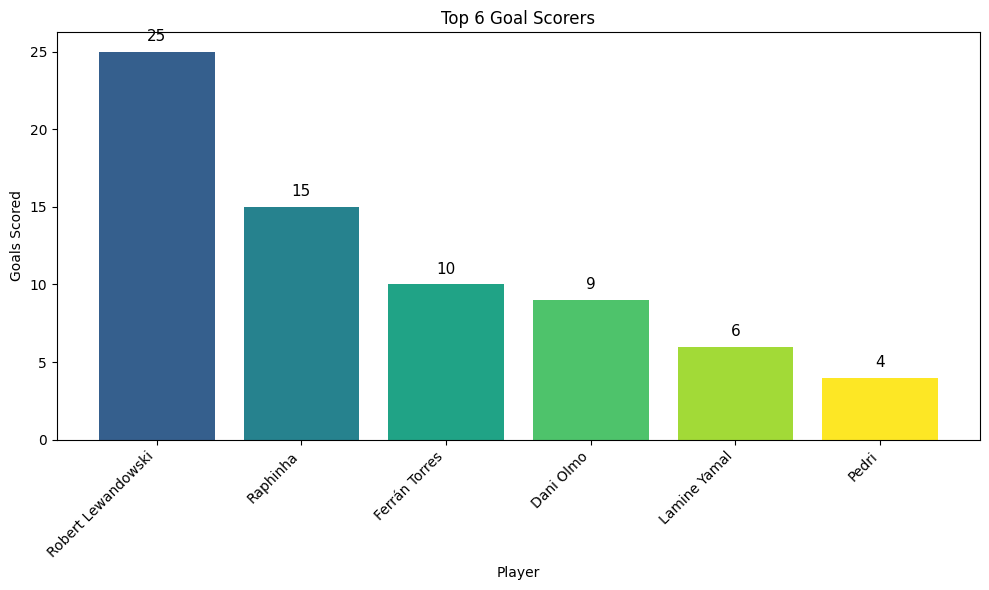

In [34]:
top_scorers = scorers.sort_values(by='Gls', ascending=False).head(6)

# Normalize colors based on number of goals
colors = plt.cm.viridis(np.linspace(0.3, 1, len(top_scorers)))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_scorers['Player'], top_scorers['Gls'], color=colors)

# Add goal numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', 
                ha='center', va='bottom', fontsize=11)

plt.xlabel('Player')
plt.ylabel('Goals Scored')
plt.title('Top 6 Goal Scorers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As expeceted, Lewa leading the scoreline with 25 goals, followed by Raphinha and Ferran. Good to see Olmo in there after playing only 2-third of the games.

### Let us look at the top assist providers for the club this season.

In [20]:
assist = players_used[players_used['Ast']>0]
print(f"{assist.shape[0]} different players have Assisted in a game for Barca this season.")
assist.sort_values('Ast',ascending=False).head(8)

19 different players have Assisted in a game for Barca this season.


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Progressive_C,Progressive_P,Progressive_R,Per_90_Gls,Per_90_Ast,Per_90_G+A,Per_90_G-PK,Per_90_G+A-PK
4,Lamine Yamal,es ESP,FW,17-286,30,27,2443.0,27.1,6.0,12.0,18.0,6.0,0.0,0.0,3.0,0.0,152.0,140.0,385.0,0.22,0.44,0.66,0.22,0.66
3,Raphinha,br BRA,"FW,MF",28-132,31,28,2461.0,27.3,15.0,9.0,24.0,13.0,2.0,2.0,4.0,0.0,84.0,129.0,296.0,0.55,0.33,0.88,0.48,0.80
0,Pedri,es ESP,MF,22-151,32,30,2529.0,28.1,4.0,4.0,8.0,4.0,0.0,0.0,2.0,0.0,77.0,295.0,115.0,0.14,0.14,0.28,0.14,0.28
15,Fermin López,es ESP,"MF,FW",21-349,23,9,942.0,10.5,3.0,4.0,7.0,3.0,0.0,0.0,3.0,1.0,23.0,57.0,74.0,0.29,0.38,0.67,0.29,0.67
7,Alejandro Balde,es ESP,DF,21-189,28,25,2080.0,23.1,0.0,4.0,4.0,0.0,0.0,0.0,2.0,0.0,98.0,86.0,231.0,0.00,0.17,0.17,0.00,0.17
6,Iñigo Martínez,es ESP,DF,33-343,26,26,2310.0,25.7,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,66.0,249.0,11.0,0.00,0.16,0.16,0.00,0.16
11,Ferrán Torres,es ESP,"FW,MF",25-055,26,11,1018.0,11.3,10.0,3.0,13.0,10.0,0.0,0.0,1.0,1.0,23.0,35.0,96.0,0.88,0.27,1.15,0.88,1.15
1,Jules Koundé,fr FRA,DF,26-164,32,29,2605.0,28.9,2.0,3.0,5.0,2.0,0.0,0.0,4.0,0.0,44.0,165.0,190.0,0.07,0.10,0.17,0.07,0.17


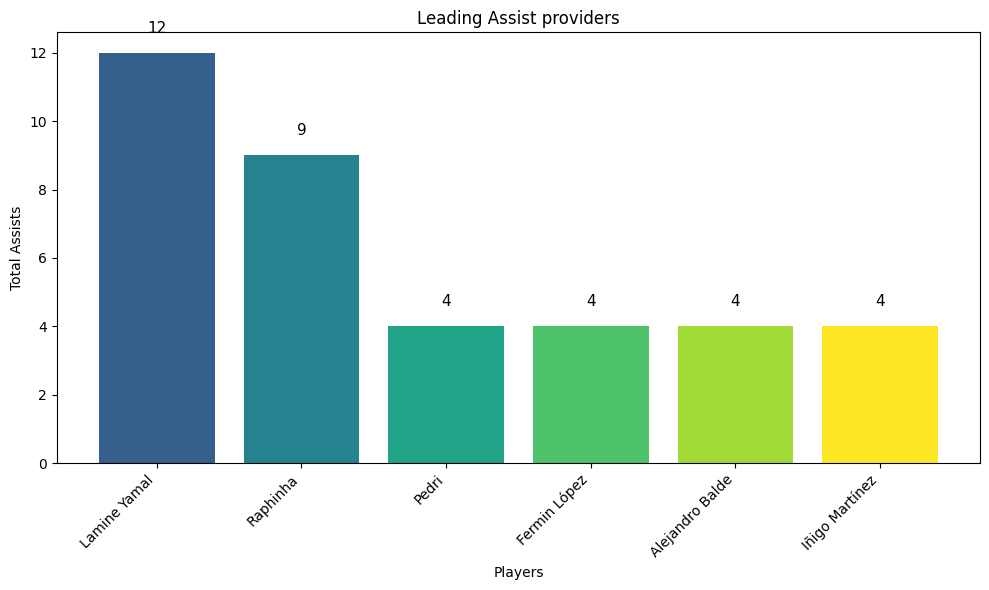

In [35]:
top_assist = assist.sort_values(by='Ast', ascending=False).head(6)

# Normalize colors based on number of goals
colors = plt.cm.viridis(np.linspace(0.3, 1, len(top_assist)))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_assist['Player'], top_assist['Ast'], color=colors)

# Add goal numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', 
                ha='center', va='bottom', fontsize=11)

plt.xlabel('Players')
plt.ylabel('Total Assists')
plt.title('Leading Assist providers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Raphinha and Yamal, both first choice wingers, have the most assists for us, also showing more attacks from the wing rather than the middle. This explains how Lewa have the most goals as he have Raphinha and Yamal feeding him passes from the wings.

### Which 5 players are most likely to recieve a yellow card in a game?

In [36]:
y_card = players_used[(players_used['CrdY']>0) &(players_used['90s']>5)]
y_card['card90'] = (y_card['CrdY']/y_card['90s'])*100
y_card_players = y_card[['Player','card90']].round(1).sort_values('card90',ascending=False)
y_card_players.head(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12036\3259571176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_card['card90'] = (y_card['CrdY']/y_card['90s'])*100


,Player,card90
13,Gavi,44.0
17,Frenkie de Jong,31.2
15,Fermin López,28.6
18,Gerard Martín,22.7
8,Marc Casado,22.3


We considered the players who have played more than 5 complete games to look at more consistently used players only, and to no one's surprise its Gavi who had 44% chances of winning a yellow card in a game.

## Progressive plays
Let us now look at some attacking stats (progressive plays)

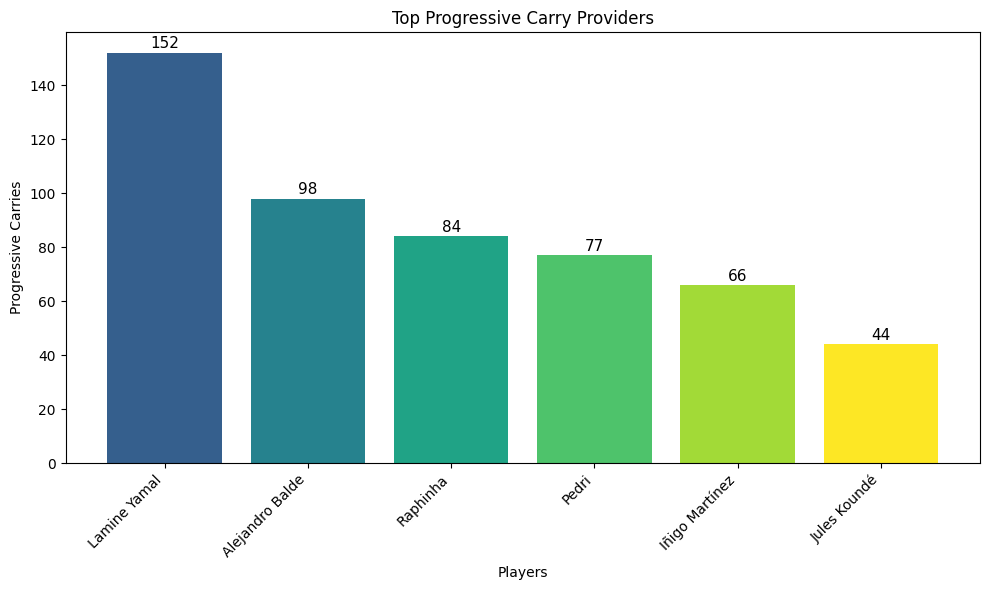

In [37]:
# Progressive Carries
top_prog_c = players.sort_values(by='Progressive_C', ascending=False).head(6)
colors = plt.cm.viridis(np.linspace(0.3, 1, len(top_prog_c)))
plt.figure(figsize=(10, 6))
bars = plt.bar(top_prog_c['Player'], top_prog_c['Progressive_C'], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11)
plt.xlabel('Players')
plt.ylabel('Progressive Carries')
plt.title('Top Progressive Carry Providers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Yamal with most assists and most carries, has significantly more carries than any other player in the sqad, demonstrating his ability to keep the ball well and creating more goal scoring opportunities for the teammates.


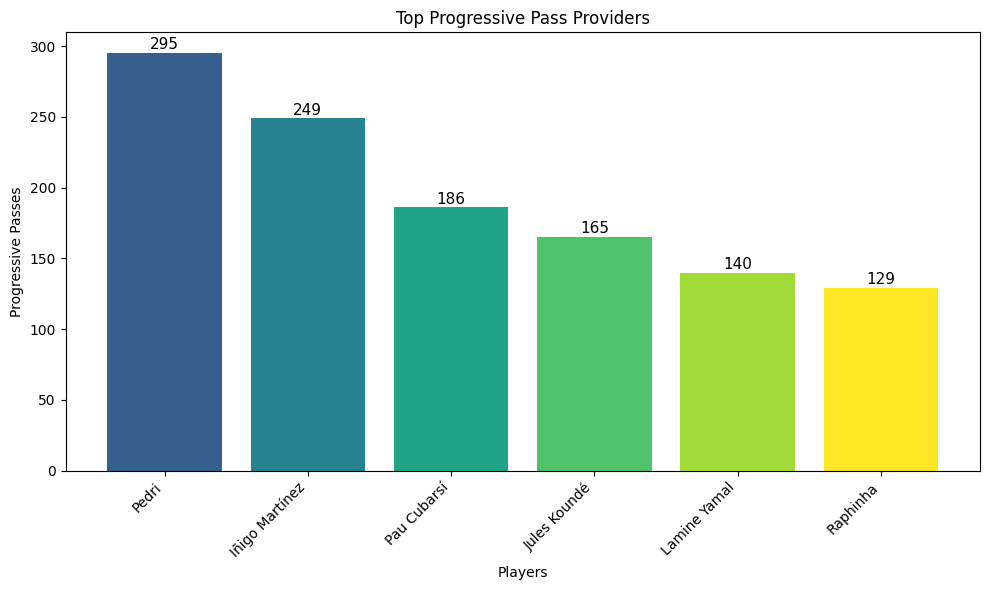

In [38]:
#Total Progressive Passes
top_prog_p = players.sort_values(by='Progressive_P', ascending=False).head(6)
colors = plt.cm.viridis(np.linspace(0.3, 1, len(top_prog_p)))
plt.figure(figsize=(10, 6))
bars = plt.bar(top_prog_p['Player'], top_prog_p['Progressive_P'], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11)
plt.xlabel('Players')
plt.ylabel('Progressive Passes')
plt.title('Top Progressive Pass Providers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pedri doing Pedri things, is the only midfileder in the sqad with most progressive plays, Followed by Inigo and Cubarsi (which are defenders so it makes sense for them to move the ball ahead in most cases). Lamine and Raphinha are the only 2 attacking players with most progressive passes for forwards in the sqad.

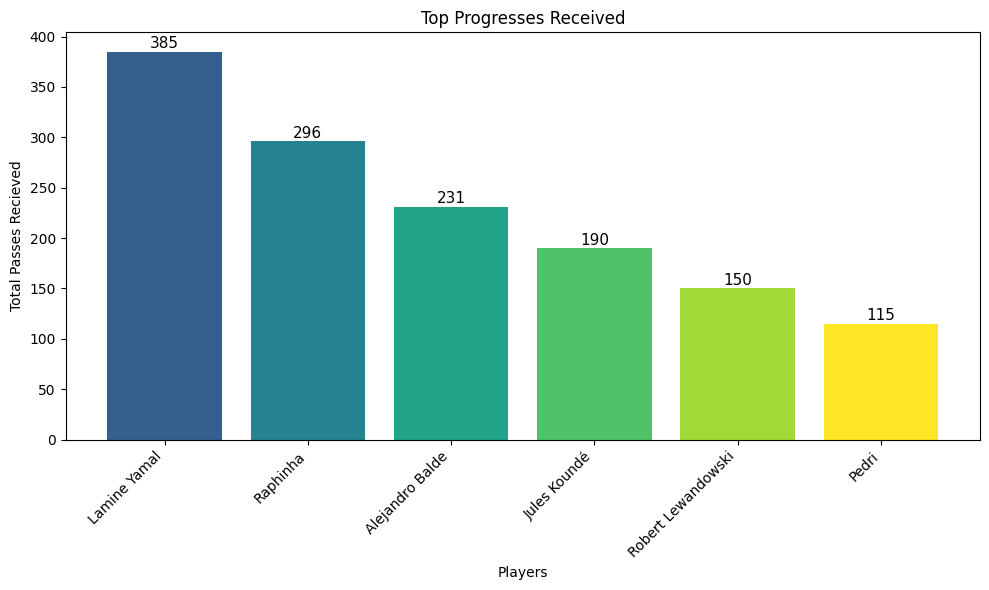

In [39]:
# Total Progressive Passes Recieved
top_prog_r = players.sort_values(by='Progressive_R', ascending=False).head(6)
colors = plt.cm.viridis(np.linspace(0.3, 1, len(top_prog_r)))
plt.figure(figsize=(10, 6))
bars = plt.bar(top_prog_r['Player'], top_prog_r['Progressive_R'], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11)
plt.xlabel('Players')
plt.ylabel('Total Passes Recieved')
plt.title('Top Progresses Received')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Yamal recieved most passes, showing teammate's reliance on him and his ability to recive, carry and create chances with the ball. The top four players with most progressive passed received plays on the wings, showing Flick's strategy of creating chances through the wing.

In [26]:
players['Per_90_Progressive'] = (players['Progressive_C'] + players['Progressive_P'] + players['Progressive_R'])/players['90s']

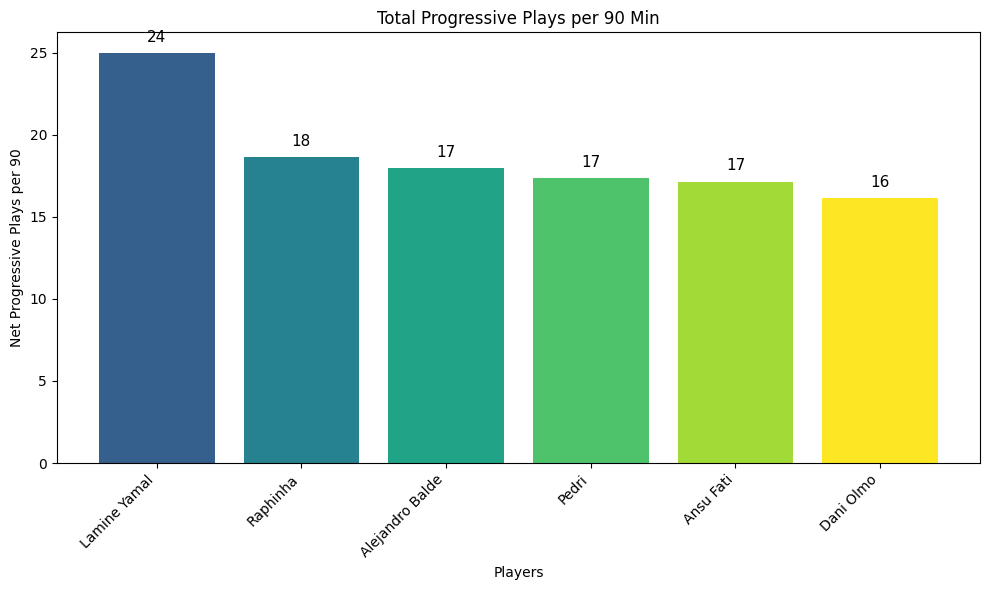

In [27]:
#Total Progressive plays per 90
top_net_prog = players.sort_values(by='Per_90_Progressive', ascending=False).head(6)
colors = plt.cm.viridis(np.linspace(0.3, 1, len(top_net_prog)))
plt.figure(figsize=(10, 6))
bars = plt.bar(top_net_prog['Player'], top_net_prog['Per_90_Progressive'], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11)
plt.xlabel('Players')
plt.ylabel('Net Progressive Plays per 90')
plt.title('Total Progressive Plays per 90 Min')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Yamal Recieved most Progressive passes (385) and completed most carries (152), Followed by Raphinha and Balde. This shows the that Barcelona mainly progressed through the wingers in order to score a goal, and how magnificent the wingers, especially Yamal, have been this season (and he's just 17!!!). 
Apart from the wingers, The midfield maestro Pedri, have completed most progressive passes.
